# Prtfolio Optimization

Portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.

In [252]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
%matplotlib inline

In [260]:
# Read Data
Stocks = ['TSLA','META']
start = dt.datetime(2010, 3, 1)
end = dt.datetime(2023, 4, 1)
test = yf.download(Stocks, start, end, interval="1d")  # Daily Data
test.head()

[*********************100%***********************]  2 of 2 completed


Adj Close           Close           High            Low            \
                META      TSLA  META      TSLA META      TSLA META      TSLA   
Date                                                                           
2010-06-29       NaN  1.592667   NaN  1.592667  NaN  1.666667  NaN  1.169333   
2010-06-30       NaN  1.588667   NaN  1.588667  NaN  2.028000  NaN  1.553333   
2010-07-01       NaN  1.464000   NaN  1.464000  NaN  1.728000  NaN  1.351333   
2010-07-02       NaN  1.280000   NaN  1.280000  NaN  1.540000  NaN  1.247333   
2010-07-06       NaN  1.074000   NaN  1.074000  NaN  1.333333  NaN  1.055333   

           Open           Volume             
           META      TSLA   META       TSLA  
Date                                         
2010-06-29  NaN  1.266667    NaN  281494500  
2010-06-30  NaN  1.719333    NaN  257806500  
2010-07-01  NaN  1.666667    NaN  123282000  
2010-07-02  NaN  1.533333    NaN   77097000  
2010-07-06  NaN  1.333333    NaN  103003500

In [261]:
# Closing price
test = test['Adj Close']
test.head()

,META,TSLA
Date,,
2010-06-29,NaN,1.592667
2010-06-30,NaN,1.588667
2010-07-01,NaN,1.464000
2010-07-02,NaN,1.280000
2010-07-06,NaN,1.074000


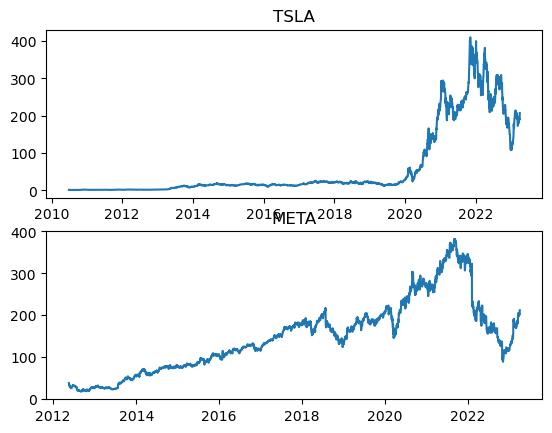

In [262]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(test['TSLA'])
ax1.set_title("TSLA")
ax2.plot(test['META'])
ax2.set_title("META")
plt.show()

Calculate percentage change in stock prices

In [263]:
#Percentage change
tesla = test['TSLA'].pct_change()
tesla.head()

Date
2010-06-29         NaN
2010-06-30   -0.002511
2010-07-01   -0.078473
2010-07-02   -0.125683
2010-07-06   -0.160937
Name: TSLA, dtype: float64

In [264]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0013069854286776427

In [265]:
# Log of Percentage change for Facebook
fb = test['META'].pct_change()
fb.head()

Date
2010-06-29   NaN
2010-06-30   NaN
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
Name: META, dtype: float64

In [266]:
# Variance
var_fb = fb.var()
var_fb

0.0006563203505849191

In [267]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
tesla_vol, fb_vol

(0.5716173170657189, 0.4050680037305215)

<AxesSubplot:>

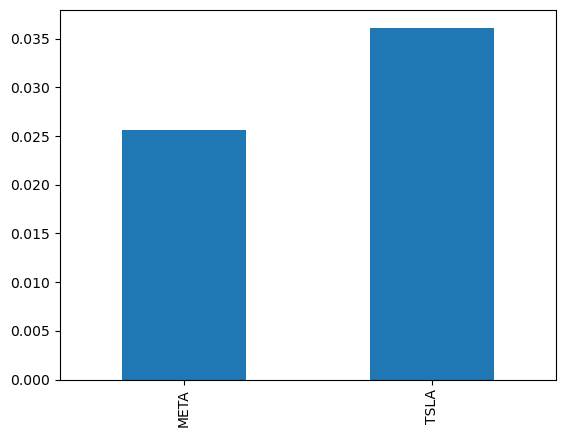

In [268]:
# Volatility of both stocks
test.pct_change().std().plot(kind='bar')

In [269]:
# Log of Percentage change
test1 = test.pct_change()
test1.head()

,META,TSLA
Date,,
2010-06-29,NaN,NaN
2010-06-30,NaN,-0.002511
2010-07-01,NaN,-0.078473
2010-07-02,NaN,-0.125683
2010-07-06,NaN,-0.160937


In [270]:
# Covariance
test1['TSLA'].cov(test1['META'])

0.0002606938942804822

In [271]:
# Coorelation
test1['TSLA'].corr(test1['META'])

0.2832519517921494

Expected Returns

In [272]:
test2 = test.pct_change()
test2.head()

,META,TSLA
Date,,
2010-06-29,NaN,NaN
2010-06-30,NaN,-0.002511
2010-07-01,NaN,-0.078473
2010-07-02,NaN,-0.125683
2010-07-06,NaN,-0.160937


In [273]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

META    0.000955
TSLA    0.002168
dtype: float64

In [274]:
# Total expected return
e_r = (e_r_ind*w).sum()

In [275]:
e_r*100

0.19251001596783207

Building an optimal risky portfolio

In [276]:
Stocks = ['AAPL', 'NKE', 'GOOGL', 'AMZN']
start = dt.datetime(2017, 3, 1)
end = dt.datetime(2023, 4, 1)
df = yf.download(Stocks, start, end, interval="1d")  # Daily Data

[*********************100%***********************]  4 of 4 completed


In [277]:
# Closing price
df = df['Adj Close']
df.head()

,AAPL,AMZN,GOOGL,NKE
Date,,,,
2017-03-01,32.752052,42.653999,42.837502,54.273846
2017-03-02,32.557590,42.445499,42.492500,54.302021
2017-03-03,32.749706,42.493999,42.453999,53.268585
2017-03-06,32.646610,42.330502,42.363499,53.334351
2017-03-07,32.688789,42.300999,42.557499,53.127670


Covariance and Correlation matrix

In [278]:
# Log of percentage change
cov_matrix = df.pct_change().cov()
cov_matrix

,AAPL,AMZN,GOOGL,NKE
AAPL,0.000392,0.000274,0.000258,0.000202
AMZN,0.000274,0.000468,0.000280,0.000191
GOOGL,0.000258,0.000280,0.000359,0.000192
NKE,0.000202,0.000191,0.000192,0.000401


In [279]:
corr_matrix = df.pct_change().corr()
corr_matrix

,AAPL,AMZN,GOOGL,NKE
AAPL,1.000000,0.639899,0.687132,0.510632
AMZN,0.639899,1.000000,0.682962,0.440554
GOOGL,0.687132,0.682962,1.000000,0.506570
NKE,0.510632,0.440554,0.506570,1.000000


In [280]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0002829344803883149

In [281]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

AAPL     0.335378
AMZN     0.172402
GOOGL    0.170004
NKE      0.156170
dtype: float64

In [282]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.18425429265721754

In [283]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().std()
ann_sd

AAPL     0.019799
AMZN     0.021630
GOOGL    0.018948
NKE      0.020021
dtype: float64

In [284]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.335378,0.019799
AMZN,0.172402,0.021630
GOOGL,0.170004,0.018948
NKE,0.156170,0.020021


In [285]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [286]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [287]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [288]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,GOOGL weight,NKE weight
0,0.209803,0.270400,0.245419,0.274849,0.375180,0.104553
1,0.240302,0.269114,0.443067,0.264179,0.032039,0.260715
2,0.226314,0.262626,0.359783,0.180176,0.198277,0.261764
3,0.226421,0.281194,0.344016,0.468977,0.071438,0.115569
4,0.176193,0.264805,0.079534,0.000402,0.416629,0.503435


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

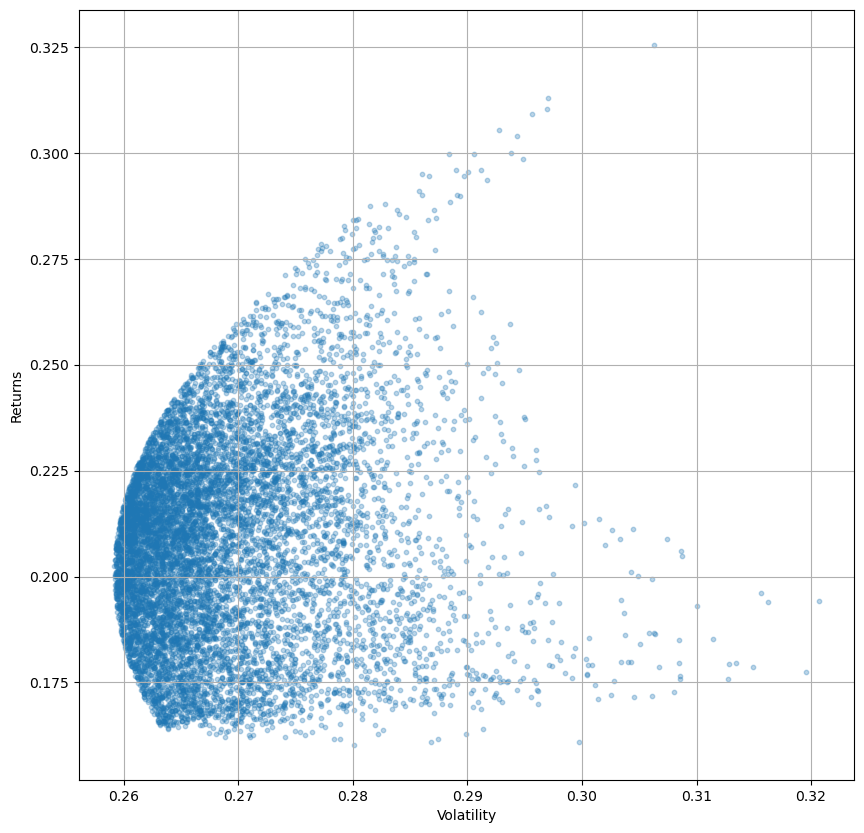

In [289]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [290]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.202403
Volatility      0.259174
AAPL weight     0.224018
AMZN weight     0.120044
GOOGL weight    0.299167
NKE weight      0.356770
Name: 1176, dtype: float64

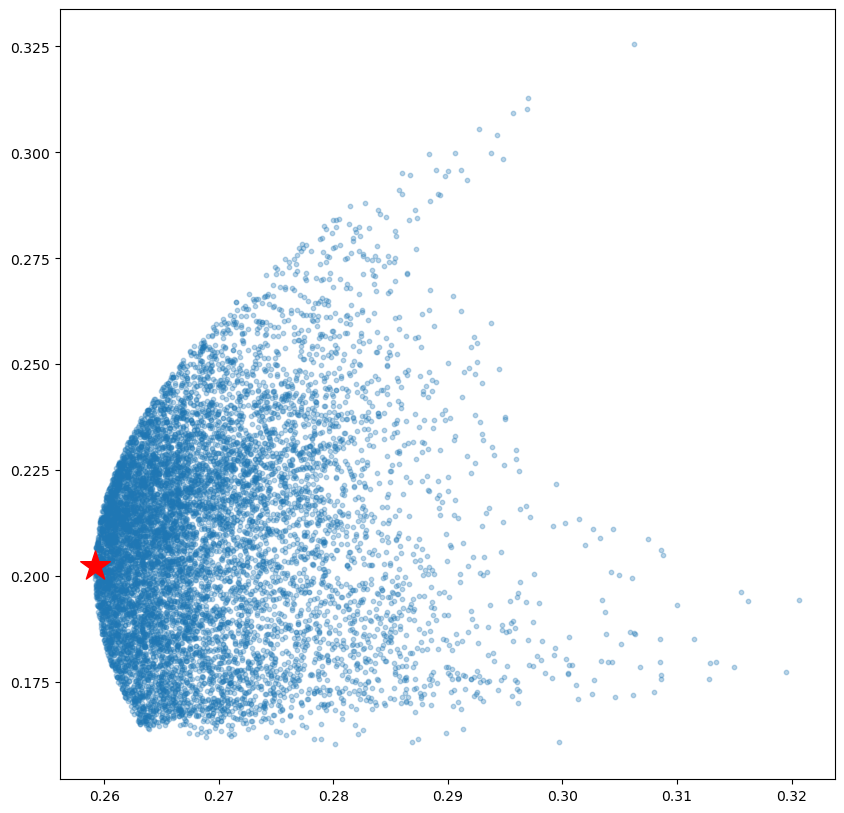

In [291]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [292]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.325512
Volatility      0.306252
AAPL weight     0.942220
AMZN weight     0.029719
GOOGL weight    0.000459
NKE weight      0.027602
Name: 9811, dtype: float64

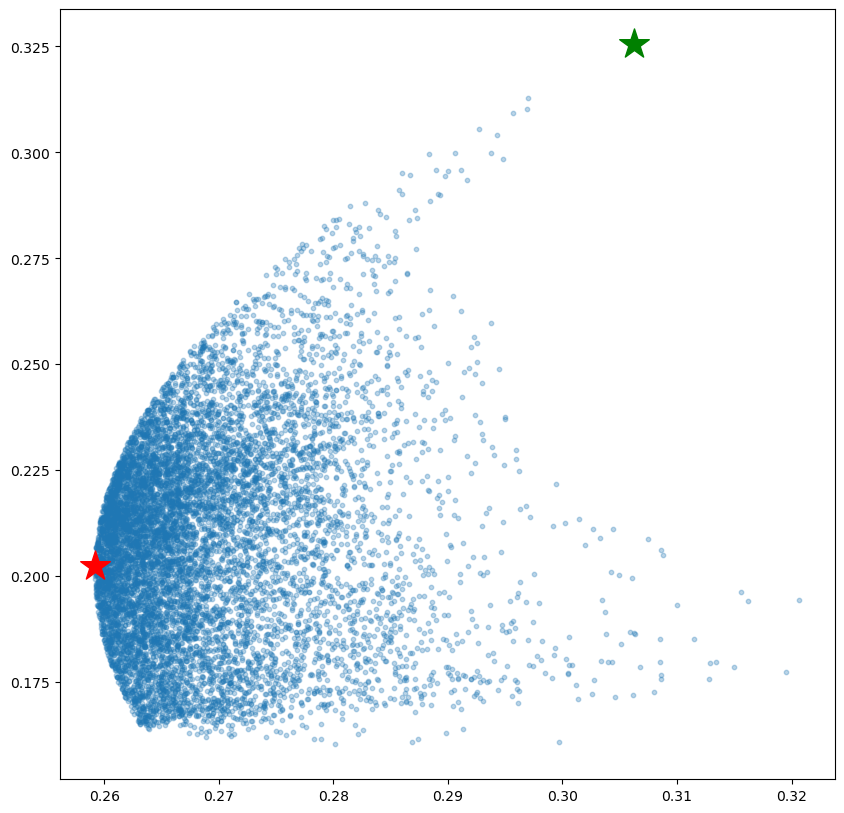

In [293]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

# Another way of doing portfolio optimization

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
from cvxopt import matrix, solvers
import yfinance as yf

In [301]:
Stocks = ["HDFCBANK.NS", "ITC.NS", "INFY.NS"]
start = dt.datetime(2017, 3, 1)
end = dt.datetime(2023, 4, 1)
multpl_stocks = yf.download(Stocks, start, end, interval="1d")  # Daily Data

[*********************100%***********************]  3 of 3 completed


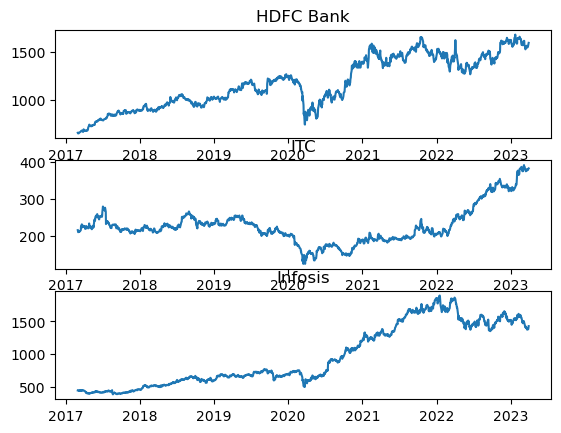

In [302]:
########################### To Plot each stock #########################

fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.plot(multpl_stocks['Adj Close']['HDFCBANK.NS'])
ax1.set_title("HDFC Bank")
ax2.plot(multpl_stocks['Adj Close']['ITC.NS'])
ax2.set_title("ITC")
ax3.plot(multpl_stocks['Adj Close']['INFY.NS'])
ax3.set_title("Infosis")
plt.show()

<Figure size 640x480 with 0 Axes>

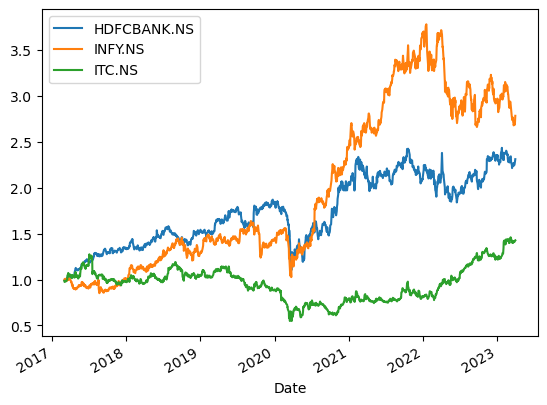

In [303]:
#########################################################################

# Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage
# of change in a time series of elements.
multpl_stock_daily_returns = multpl_stocks['Close'].pct_change()
fig = plt.figure()
# cumprod() function is used when we want to compute the cumulative product of array elements over a given axis.
(multpl_stock_daily_returns + 1).cumprod().plot()
plt.show()

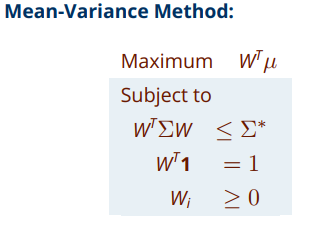

In [304]:
E = np.array(multpl_stock_daily_returns.mean(axis=0)).reshape(-1,1)
# Calculate the covariance matrix of the asset's returns
cov_matrix = np.array(multpl_stock_daily_returns.cov())
# Ones vector
ones = np.ones((E.shape[0],1))
zeros = np.zeros((2,2))

# Put together the A matrix
A = 2*cov_matrix
A = np.append(A, E.T, axis=0)
A = np.append(A, ones.T, axis=0)
temp = np.append(E, ones, axis=1)
temp = np.append(temp, zeros, axis=0)
A = np.append(A, temp, axis=1)
# Put together the b vector
b = np.array([[0],
              [0],
              [0],
              E[0],  # I set the target return to be the expected return of stocks So in essense, I am looking for an optimal portfolio that is expected to give the same return as I get from investing in stocks (but with lower risk)
              [1]])

In [305]:
# Optimize using matrix algebra
from numpy.linalg import inv
results = inv(A).dot(b)
# Grab first 3 elements of results because those are the weights
# Recall that we optimize across 3 assets so there are 3 weights
opt_W = results[:multpl_stock_daily_returns.shape[1]]

In [306]:
opt_W

array([[0.39564247],
       [0.4017068 ],
       [0.20265073]])